In [1]:
import pandas as pd

df = pd.read_csv("outputs/dedup/manifest_dedup.csv.gz", compression="gzip")
label = pd.read_csv("outputs/docform/docform_labeling_sheet.csv")
samples = pd.read_csv("outputs/docform/docform_cluster_samples.tsv", sep="\t")

print("df:", df.shape)
print("label:", label.shape)
print("samples:", samples.shape)
label.head()


df: (26054, 51)
label: (7, 9)
samples: (84, 19)


,human_doc_type,human_doc_type_confidence,human_notes,keep_for_ontology,priority,docform_cluster,n_docs,example_rel_paths,example_previews
0,NaN,NaN,NaN,NaN,NaN,c0005,1116,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,From: G Maxwell [gmax1@ellmax.com] \r Sent: 9/...
1,NaN,NaN,NaN,NaN,NaN,c0003,1012,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,﻿\r \r \r \r \r JOBS\r \r AUTOS\r \r HOMES\r \...
2,NaN,NaN,NaN,NaN,NaN,c0001,473,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,From: \r Sent: \r To: \r Subject: \r Attachmen...
3,NaN,NaN,NaN,NaN,NaN,c0000,164,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,"﻿From: \t""Saved by Internet Explorer 11""\t\r S..."
4,NaN,NaN,NaN,NaN,NaN,c0002,122,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,Source Entry: H\Macintosh HD\root\Users\jee\Li...


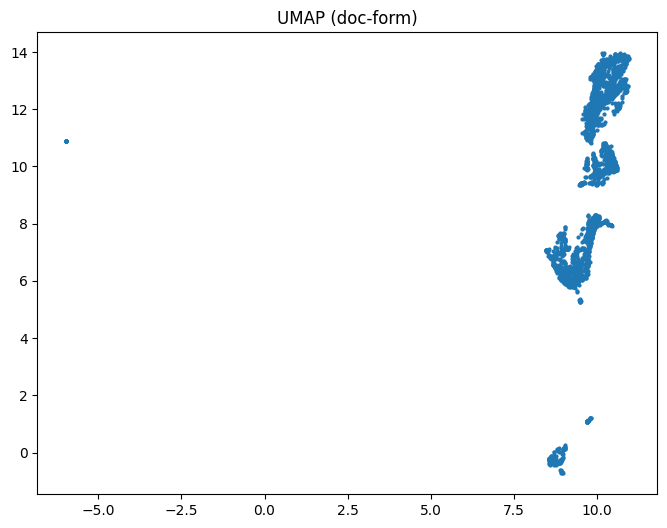

In [2]:
import matplotlib.pyplot as plt

emb = pd.read_csv("outputs/docform/umap_embedding.csv")
# plot only first 2 dims
plt.figure(figsize=(8,6))
plt.scatter(emb["umap_0"], emb["umap_1"], s=4)
plt.title("UMAP (doc-form)")
plt.show()


In [3]:
means = pd.read_csv("outputs/docform/docform_cluster_feature_means.csv")
means.head(20)

,docform_cluster,n_docs,n_chars,n_lines,n_tokens,blank_lines,avg_line_len,max_line_len,digit_ratio,upper_ratio,non_ascii_ratio,email_count,phone_like_count,date_like_count,money_like_count
0,c0005,1116,3019.871864,62.853047,451.232975,0.000000,45.465009,106.708781,0.025529,0.043173,0.000137,5.145161,0.154122,1.026882,0.008961
1,c0003,1012,42713.284585,736.582016,6770.978261,15.355731,58.594207,121.337945,0.022227,0.052733,0.002258,2.922925,65.782609,4.975296,14.864625
2,c0001,473,1685.536998,51.209302,220.919662,0.063425,37.750162,100.393235,0.056720,0.123128,0.000478,1.067653,0.386892,0.983087,0.162791
3,c0000,164,39173.481707,320.871951,5598.042683,172.060976,139.231592,1374.658537,0.040781,0.045218,0.003411,1.646341,23.365854,0.573171,5.335366
4,c0002,122,23599.926230,526.557377,2952.418033,5.237705,29.302401,81.565574,0.214673,0.124050,0.002011,21.778689,371.229508,354.868852,0.852459
5,c0004,35,6602.714286,133.200000,943.057143,0.000000,48.314008,115.000000,0.032708,0.061750,0.000653,5.428571,4.600000,1.314286,0.000000
6,noise,19,44246.631579,1.000000,1299.263158,0.000000,44246.631579,44246.631579,0.084206,0.039124,0.001539,0.526316,43.210526,1.210526,3.105263


In [4]:
df = pd.read_csv("outputs/dedup/manifest_dedup.csv.gz", compression="gzip")

df_use = df[df["docform_cluster"].notna()].copy()
df_use["docform_cluster"].value_counts().head(30)

# print(df.info)

docform_cluster
c0005    1116
c0003     994
c0001     470
c0000     161
c0002     122
c0004      35
noise      19
Name: count, dtype: int64

In [5]:
cid = "c0002"
subset = df[df["docform_cluster"] == cid]

print(len(subset), "documents in cluster", cid)
print("\n--- First 50 paths ---")
for p in subset.head(50).iterrows():
    print(p[1]["rel_path"])
    # print(p[1]["preview"])


122 documents in cluster c0002

--- First 50 paths ---
TEXT-20251116T222102Z-1-001/TEXT/002/HOUSE_OVERSIGHT_032204.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027720.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_025403.txt
TEXT-20251116T222102Z-1-001/TEXT/002/HOUSE_OVERSIGHT_032208.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027585.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027165.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027332.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_031045.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027536.txt
Jeffrey Epstein Part 12 of 12.pdf
Jeffrey Epstein Part 06 of 08.pdf
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_026678.txt
Jeffrey Epstein Part 03 of 08.pdf
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_026635.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027128.txt
TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVERSIGHT_027655.txt
TEXT-202511

In [ ]:
# human labeling assignments ( VALIDATE BELOW BEFORE RUNNING )
assign = {
    # "c0002": "ichat_money_list_fbi", # me
    "c0002": "chat_ichat_money_list", # docform labeling 
    # "c0005": "email_blackmail_social", # me
    "c0005": "email_outlook_social", # docform labeling
    # "c0004": "email_elite_influence_correspondence", # me
    "c0004": "email_outlook_influence", # docform labeling
    # "c0001": "email_power_business_short", # me
    "c0001": "email_power_business_short", # docform labeling
    # "c0003": "email_strategy_politics_investment", # me
    "c0003": "email_media_strategy_politics", # docform labeling
    # "c0000": "media_article_with_metadata", # me
    "c0000": "media_article_with_metadata", # docform labeling
    "noise": "json_artifacts_noise" # docform labeling
}

label["human_doc_type"] = label["human_doc_type"].fillna("")
label.loc[label["docform_cluster"].isin(assign.keys()), "human_doc_type"] = label["docform_cluster"].map(assign)

# Defaults
label.loc[label["human_doc_type"] != "", "keep_for_ontology"] = "yes"
label.loc[label["human_doc_type"].isin(["machine_json_or_noise","web_clip_or_redaction_noise"]), "keep_for_ontology"] = "maybe"

label.to_csv("outputs/docform/docform_labeling_sheet_labeled.csv", index=False)
label.head(20)


/var/folders/zx/5rm4vsbn4z90f_3mg3tbjqp5zmq2hl/T/ipykernel_60512/4269658726.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  label.loc[label["human_doc_type"] != "", "keep_for_ontology"] = "yes"


,human_doc_type,human_doc_type_confidence,human_notes,keep_for_ontology,priority,docform_cluster,n_docs,example_rel_paths,example_previews
0,email_blackmail_social,NaN,NaN,yes,NaN,c0005,1116,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,From: G Maxwell [gmax1@ellmax.com] \r Sent: 9/...
1,email_strategy_politics_investment,NaN,NaN,yes,NaN,c0003,1012,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,﻿\r \r \r \r \r JOBS\r \r AUTOS\r \r HOMES\r \...
2,email_power_business_short,NaN,NaN,yes,NaN,c0001,473,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,From: \r Sent: \r To: \r Subject: \r Attachmen...
3,media_article_with_metadata,NaN,NaN,yes,NaN,c0000,164,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,"﻿From: \t""Saved by Internet Explorer 11""\t\r S..."
4,ichat_money_list_fbi,NaN,NaN,yes,NaN,c0002,122,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,Source Entry: H\Macintosh HD\root\Users\jee\Li...
5,email_elite_influence_correspondence,NaN,NaN,yes,NaN,c0004,35,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,From: BARBRO EHNBOM \r Sent: 8/20/2012 1:23:57...
6,json_artifacts_noise,NaN,NaN,yes,NaN,noise,19,TEXT-20251116T222102Z-1-001/TEXT/001/HOUSE_OVE...,"﻿{""componentLayouts"":{""_defaultComponentLayout..."


In [7]:
label_l = pd.read_csv("outputs/docform/docform_labeling_sheet_labeled.csv")

mf2 = df.merge(label_l[["docform_cluster","human_doc_type","keep_for_ontology","priority","human_notes"]],
               on="docform_cluster", how="left")

mf2.to_csv("outputs/docform/manifest_with_doc_types.csv.gz", index=False, compression="gzip")
mf2[["docform_cluster","human_doc_type"]].value_counts().head(20)


docform_cluster  human_doc_type                      
c0005            email_blackmail_social                  1116
c0003            email_strategy_politics_investment       994
c0001            email_power_business_short               470
c0000            media_article_with_metadata              161
c0002            ichat_money_list_fbi                     122
c0004            email_elite_influence_correspondence      35
noise            json_artifacts_noise                      19
Name: count, dtype: int64